# Science Case #1:

Find all <source-type> within a given area of the sky with emission from
<molecule(s)> detected.


The science motivation might be to find all young stellar objects (YSOs) in Taurus with ALMA
detections of CO J=2-1. The return from this query would include images of the moment maps of
CO emission, peak intensity, resolution, noise, correlator setting, and other relevant information
from any Taurus YSOs (as identified by science keywords, abstract text, SIMBAD coordinate
matches) in the publicly accessible ALMA Science Archive. The user could identify which data
are appropriate for their study an pull the u,v data or image cubes of interest from the archive.

Optionally, the user could then create a query to retrieve the full set of science products for all
sources, or the sources of interest. This would allow exploration of continuum and other lines
detected in the same observations. The quantitative data are returned as tables in the user’s
Python environment (for example Jupyter notebook) which can then be manipulated (see Section
4), for example to produce a plot of continuum flux versus CO integrated intensity or CO
intensity versus [13CO/12CO] intensity ratio.

*NB on nomenclature I am using below: Targets are object names, sources are results of ADMIT source find*

In [1]:
from astroquery.admit import ADMIT, ADMIT_FORM_KEYS
from astroquery.alma import Alma, tapsql
from astropy.coordinates import SkyCoord
from astropy import units as u
import pandas as pd
import matplotlib.pyplot as plt
# Display options
# display the whole table inthe notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',25)
cols_to_exclude = ['id','project_abstract','obs_title','fcoverage','science_keyword']


In [2]:
a = ADMIT()
a.check()

Found  /home/mpound/src/astroumd/study7/query/admit.db
Checking db.... 0
71 71 71
Database version: 24-feb-2022. core.py version: 2022-March-03
header    : 103 entries
alma      : 103 entries
win       : 103 entries
lines     : 26 entries
sources   : 268 entries


### Show what search keywords are available

In [4]:
a.key_description.show_in_notebook()
a.key_description.write('/tmp/kd.tex',format='latex')

### Find projects about black holes. Search keywords can use unix wildcards (*,?)
Note: we avoid B and H for because the underlying SQL search is case sensitive

In [26]:
result = a.query(project_abstract="*lack*ole*")
#len(result)
lst = set(zip(result['obs_id'],result['target_name']))
print("Found these projects and targets:",
      *('{}: {}'.format(*k[1]) for k in enumerate(lst)), sep="\n")

select * from alma inner join win on (win.a_id = alma.id)  WHERE alma.project_abstract LIKE '%lack%ole%' 

Found these projects and targets:
uid://A001/X1288/Xbba: NGC4402
uid://A001/X1288/Xba2: NGC3049
uid://A001/X1288/Xbc4: NGC5253
uid://A001/X1288/Xba0: NGC3049
uid://A001/X1296/X6f3: 5-NGC3773
uid://A001/X1288/Xba6: NGC3504
uid://A001/X1288/Xbc6: NGC5253
uid://A001/X1288/Xba8: NGC3504
uid://A001/X1288/Xbc0: NGC4414
uid://A001/X1296/X6f1: 5-NGC3773
uid://A001/X1288/Xbbe: NGC4414
uid://A001/X1288/Xbae: NGC3593


### Limit the result to those with sources found in the Cubesum


In [27]:
result[result['nsources']>0]

,id,obs_id,target_name,s_ra,s_dec,frequency,t_min,project_abstract,obs_title,science_keyword,scientific_category,proposal_authors,id,a_id,spw,freqc,freqw,vlsr,nlines,nsources,nchan,peak_w,rms_w,bmaj,bmin,bpa,fcoverage
2,3,uid://A001/X1288/Xba0,NGC3049,148.706950,9.271113,243.826966,58067.386351,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",3,3,spw23,243.834820,1.703100,1447.989431,1,2,109,0.001538,0.000180,0.000010,0.000007,38.894366,0.045872
11,12,uid://A001/X1288/Xba8,NGC3504,165.796595,27.972404,243.760022,58119.297186,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",12,12,spw23,243.767847,1.703031,1521.106704,1,30,109,0.003791,0.000348,0.000061,0.000043,31.262782,0.110092
12,13,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",13,13,spw16,230.055109,1.873035,628.000000,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,0.113139
17,18,uid://A001/X1288/Xbbe,NGC4414,186.612807,31.223649,242.171714,58055.540738,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",18,18,spw21,242.171752,1.843684,715.580697,1,11,118,0.001920,0.000186,0.000014,0.000008,13.836914,0.050847
23,24,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,242.420288,58076.500165,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",24,24,spw21,242.428132,1.703123,401.856222,2,1,109,0.001377,0.000173,0.000015,0.000012,31.885514,0.045872
38,51,uid://A001/X1288/Xba2,NGC3049,148.706950,9.271113,227.609012,58379.538206,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",51,51,spw19,227.609017,1.624995,0.000000,0,2,1,0.000213,0.000034,0.000097,0.000075,50.262486,0.000000
40,53,uid://A001/X1288/Xba2,NGC3049,148.706950,9.271113,243.816538,58379.538206,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",53,53,spw23,243.832169,1.624997,0.000000,0,1,1,0.000302,0.000041,0.000090,0.000070,50.122395,0.000000
41,54,uid://A001/X1288/Xba2,NGC3049,148.706950,9.271113,229.424396,58379.538206,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",54,54,spw25,228.873145,0.758804,0.000000,0,1,1,0.000335,0.000043,0.000097,0.000075,49.054157,0.000000
43,56,uid://A001/X1288/Xba6,NGC3504,165.796595,27.972404,241.511633,58050.543677,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",56,56,spw21,241.527290,1.624954,0.000000,0,1,1,0.000229,0.000036,0.000014,0.000008,23.725830,0.000000
46,59,uid://A001/X1288/Xba8,NGC3504,165.796595,27.972404,227.554761,58119.297186,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",59,59,spw19,227.554773,1.624910,0.000000,0,1,1,0.000528,0.000049,0.000061,0.000045,33.040379,0.000000


### Limit the result to those with sources found in the Cubesum and the lines were identified

In [28]:
result[(result['nsources']>0) & (result['nlines']>0)]

,id,obs_id,target_name,s_ra,s_dec,frequency,t_min,project_abstract,obs_title,science_keyword,scientific_category,proposal_authors,id,a_id,spw,freqc,freqw,vlsr,nlines,nsources,nchan,peak_w,rms_w,bmaj,bmin,bpa,fcoverage
2,3,uid://A001/X1288/Xba0,NGC3049,148.706950,9.271113,243.826966,58067.386351,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",3,3,spw23,243.834820,1.703100,1447.989431,1,2,109,0.001538,0.000180,0.000010,0.000007,38.894366,0.045872
11,12,uid://A001/X1288/Xba8,NGC3504,165.796595,27.972404,243.760022,58119.297186,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",12,12,spw23,243.767847,1.703031,1521.106704,1,30,109,0.003791,0.000348,0.000061,0.000043,31.262782,0.110092
12,13,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",13,13,spw16,230.055109,1.873035,628.000000,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,0.113139
17,18,uid://A001/X1288/Xbbe,NGC4414,186.612807,31.223649,242.171714,58055.540738,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",18,18,spw21,242.171752,1.843684,715.580697,1,11,118,0.001920,0.000186,0.000014,0.000008,13.836914,0.050847
23,24,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,242.420288,58076.500165,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",24,24,spw21,242.428132,1.703123,401.856222,2,1,109,0.001377,0.000173,0.000015,0.000012,31.885514,0.045872


### Black hole projects with CO 2-1 detections

In [29]:
result = a.query(formula="CO", transition="2-1", project_abstract="*lack*ole*")
lst = set(zip(result['obs_id'],result['target_name']))
print("Found these projects and targets:",
      *('{}: {}'.format(*k[1]) for k in enumerate(lst)), sep="\n")
result

select * from alma inner join win on (win.a_id = alma.id)  inner join lines on (lines.w_id = win.id )  WHERE lines.formula='CO' AND lines.transition='2-1' AND alma.project_abstract LIKE '%lack%ole%' 

Found these projects and targets:
uid://A001/X1288/Xbae: NGC3593


,id,obs_id,target_name,s_ra,s_dec,frequency,t_min,project_abstract,obs_title,science_keyword,scientific_category,proposal_authors,id,a_id,spw,freqc,freqw,vlsr,nlines,nsources,nchan,peak_w,rms_w,bmaj,bmin,bpa,fcoverage,id,w_id,formula,transition,restfreq,vmin,vmax,mom0flux,mom1peak,mom2peak
0,13,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",13,13,spw16,230.055109,1.873035,628.0,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,0.113139,7,13,CO,2-1,230.538,-136.849,138.029,11534.2,639.522,70.2828


### Black hole projects within a square region

In [30]:
# Center coordinate
c = SkyCoord('11h15m30s', '+12d45m00s', frame='icrs')
# Square box side size
size = 40*u.degree
result = a.query(project_abstract="*lack*ole*", region = [c,size])
lst = set(zip(result['obs_id'],result['target_name']))
print("Found these projects and targets:",
      *('{}: {}'.format(*k[1]) for k in enumerate(lst)), sep="\n")
print(f"The unique targets  are: {result['target_name'].unique()}")

select * from alma inner join win on (win.a_id = alma.id)  inner join sources on (sources.w_id = win.id)   WHERE alma.project_abstract LIKE '%lack%ole%' AND  sources.ra > 128.87499999999997 AND sources.ra < 208.87499999999997 AND sources.dec > -27.25 AND sources.dec < 52.75  AND sources.l_id = 0  

Found these projects and targets:
uid://A001/X1288/Xba2: NGC3049
uid://A001/X1288/Xba0: NGC3049
uid://A001/X1288/Xba6: NGC3504
uid://A001/X1288/Xba8: NGC3504
uid://A001/X1288/Xbae: NGC3593
The unique targets  are: ['NGC3049' 'NGC3504' 'NGC3593']


### Plot them on the sky

Text(0, 0.5, 'Target DEC (deg)')

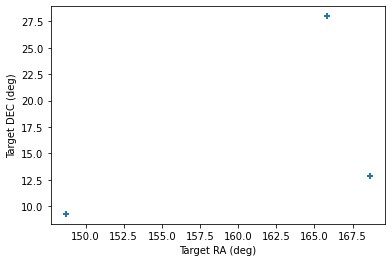

In [31]:
plt.scatter(result['s_ra'],result['s_dec'],marker="+")
plt.xlabel("Target RA (deg)")
plt.ylabel("Target DEC (deg)")

### Black hole projects within a square region and CO2-1 detected

In [32]:
c = SkyCoord('11h15m30s', '+12d45m00s', frame='icrs')
size = 40*u.degree
result = a.query(project_abstract="*lack*ole*", region = [c,size], formula="CO", transition="2-1")
print(f"Targets found: {result['target_name'].unique()}")

select * from alma inner join win on (win.a_id = alma.id)  inner join sources on (sources.w_id = win.id)   inner join lines on (lines.w_id = win.id )  WHERE alma.project_abstract LIKE '%lack%ole%' AND  sources.ra > 128.87499999999997 AND sources.ra < 208.87499999999997 AND sources.dec > -27.25 AND sources.dec < 52.75  AND lines.formula='CO' AND lines.transition='2-1' AND sources.l_id > 0  

Targets found: ['NGC3593']


In [43]:
#columns to include 
ci = [x for x in result.columns if x not in cols_to_exclude]
result[ci]

,obs_id,target_name,s_ra,s_dec,frequency,t_min,scientific_category,proposal_authors,a_id,spw,freqc,freqw,vlsr,nlines,nsources,nchan,peak_w,rms_w,bmaj,bmin,bpa,w_id,w_id,l_id,ra,dec,peak_s,flux,smaj,smin,spa,snr_s,w_id,w_id,formula,transition,restfreq,vmin,vmax,mom0flux,mom1peak,mom2peak
0,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,Galaxy evolution,"Greene, Jenny; Seth, ...",13,spw16,230.055109,1.873035,628.0,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,13,13,7,168.651429,12.818542,1.067760,0.002997,0.295000,0.295000,89.999300,13.087591,13,13,CO,2-1,230.538,-136.849,138.029,11534.2,639.522,70.2828
1,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,Galaxy evolution,"Greene, Jenny; Seth, ...",13,spw16,230.055109,1.873035,628.0,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,13,13,7,168.651537,12.818553,1.202970,0.034139,1.149430,0.765368,84.243000,14.744867,13,13,CO,2-1,230.538,-136.849,138.029,11534.2,639.522,70.2828
2,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,Galaxy evolution,"Greene, Jenny; Seth, ...",13,spw16,230.055109,1.873035,628.0,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,13,13,7,168.651696,12.817786,1.311670,0.049730,1.358440,0.865201,58.246100,16.077209,13,13,CO,2-1,230.538,-136.849,138.029,11534.2,639.522,70.2828
3,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,Galaxy evolution,"Greene, Jenny; Seth, ...",13,spw16,230.055109,1.873035,628.0,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,13,13,7,168.651717,12.817686,1.022760,0.038760,1.708870,0.687474,138.463000,12.536024,13,13,CO,2-1,230.538,-136.849,138.029,11534.2,639.522,70.2828
4,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,Galaxy evolution,"Greene, Jenny; Seth, ...",13,spw16,230.055109,1.873035,628.0,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,13,13,7,168.651792,12.818628,0.990147,0.028875,1.495470,0.604512,56.438500,12.136285,13,13,CO,2-1,230.538,-136.849,138.029,11534.2,639.522,70.2828
5,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,Galaxy evolution,"Greene, Jenny; Seth, ...",13,spw16,230.055109,1.873035,628.0,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,13,13,7,168.651862,12.817903,1.181720,0.047802,1.797960,0.697448,60.375500,14.484405,13,13,CO,2-1,230.538,-136.849,138.029,11534.2,639.522,70.2828
6,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,Galaxy evolution,"Greene, Jenny; Seth, ...",13,spw16,230.055109,1.873035,628.0,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,13,13,7,168.652896,12.817714,0.970287,0.027930,1.201900,0.742447,63.984500,11.892859,13,13,CO,2-1,230.538,-136.849,138.029,11534.2,639.522,70.2828
7,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,Galaxy evolution,"Greene, Jenny; Seth, ...",13,spw16,230.055109,1.873035,628.0,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,13,13,7,168.653063,12.817764,0.902846,0.036546,1.553820,0.807577,70.879700,11.066232,13,13,CO,2-1,230.538,-136.849,138.029,11534.2,639.522,70.2828
8,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,Galaxy evolution,"Greene, Jenny; Seth, ...",13,spw16,230.055109,1.873035,628.0,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,13,13,7,168.653292,12.817803,1.127970,0.032742,1.104430,0.814771,129.090000,13.825588,13,13,CO,2-1,230.538,-136.849,138.029,11534.2,639.522,70.2828
9,uid://A001/X1288/Xbae,NGC3593,168.654583,12.817675,230.055098,58384.714766,Galaxy evolution,"Greene, Jenny; Seth, ...",13,spw16,230.055109,1.873035,628.0,1,30,1918,0.068626,0.001117,0.000093,0.000081,35.348176,13,13,7,168.653625,12.818261,1.197260,0.057541,1.772580,0.840521,75.704900,14.674880,13,13,CO,2-1,230.538,-136.849,138.029,11534.2,639.522,70.2828


### Plot them on the sky

Text(0, 0.5, 'CubeSum Source DEC (deg)')

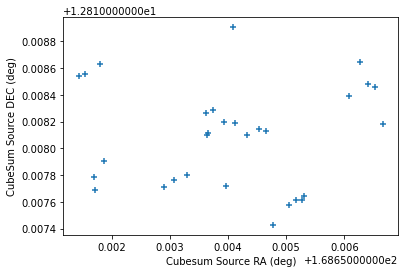

In [34]:
plt.scatter(result['ra'],result['dec'],marker="+")  # note ra,dec = source; s_ra,s_dec = target
plt.xlabel("Cubesum Source RA (deg)")
plt.ylabel("CubeSum Source DEC (deg)")

### Find where NGC3504 has lines detected with moment 0 flux greater than one

In [13]:
result=a.query(source_name_alma="NGC3504",mom0flux=">1")
result

select * from alma inner join win on (win.a_id = alma.id)  inner join lines on (lines.w_id = win.id )  WHERE alma.target_name='NGC3504' AND lines.mom0flux>=1.0 



,id,obs_id,target_name,s_ra,s_dec,frequency,t_min,project_abstract,obs_title,science_keyword,scientific_category,proposal_authors,id,a_id,spw,freqc,freqw,vlsr,nlines,nsources,nchan,peak_w,rms_w,bmaj,bmin,bpa,fcoverage,id,w_id,formula,transition,restfreq,vmin,vmax,mom0flux,mom1peak,mom2peak
0,9,uid://A001/X1288/Xba6,NGC3504,165.796595,27.972404,243.760018,58050.543677,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",9,9,spw23,243.767863,1.703072,1521.106704,1,0,109,0.001868,0.000228,0.000011,0.000008,0.549408,0.036697,5,9,CS,5-4,244.93556,272.8500,330.5140,3429.8800,1831.72,33.6674
1,12,uid://A001/X1288/Xba8,NGC3504,165.796595,27.972404,243.760022,58119.297186,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",12,12,spw23,243.767847,1.703031,1521.106704,1,30,109,0.003791,0.000348,0.000061,0.000043,31.262782,0.110092,6,12,CS,5-4,244.93556,-92.3354,119.0950,1090.5600,1549.75,80.4934
2,36,uid://A001/X87a/X706,NGC3504,165.796629,27.972436,229.366802,57713.452563,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",36,36,spw25,229.366820,-1.867056,1521.106704,1,30,478,0.253098,0.001223,0.000185,0.000126,4.444983,0.142259,21,36,CO,2-1,230.53800,-158.9050,183.1460,24782.4000,1548.35,60.9915
3,38,uid://A001/X87a/X706,NGC3504,165.796629,27.972436,243.689957,57713.452563,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",38,38,spw29,243.689976,1.867059,1521.106704,1,1,478,0.012112,0.001397,0.000174,0.000118,4.293194,0.025105,22,38,CS,5-4,244.93556,-66.2128,-13.3561,140.5190,1483.46,15.8738
4,40,uid://A001/X87a/X708,NGC3504,165.796629,27.972436,229.366820,57830.136178,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",40,40,spw25,229.366821,-1.867263,1521.106704,1,6,478,1.064880,0.002485,0.000537,0.000437,24.441084,0.138075,23,40,CO,2-1,230.53800,-153.8190,178.0590,32461.2000,1539.72,59.0989
5,42,uid://A001/X87a/X708,NGC3504,165.796629,27.972436,243.690784,57830.136178,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",42,42,spw29,243.690785,1.867264,1521.106704,1,1,478,0.023037,0.002596,0.000550,0.000420,9.199411,0.046025,24,42,CS,5-4,244.93556,-43.1873,57.7322,107.7540,1538.80,31.0504
6,43,uid://A001/X87a/X70a,NGC3504,165.796629,27.973328,229.366824,57704.450990,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",43,43,spw16,229.366865,1.867088,1521.106704,1,1,478,3.110140,0.005382,0.001761,0.001609,66.427072,0.150628,25,43,CO,2-1,230.53800,-174.2840,188.1950,26393.2000,1537.47,40.2249
7,45,uid://A001/X87a/X70a,NGC3504,165.796629,27.973328,243.689992,57704.450990,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",45,45,spw20,243.690031,1.867093,1521.106704,1,1,478,0.043824,0.005212,0.001621,0.001531,51.806499,0.056485,26,45,CS,5-4,244.93556,-42.2564,82.6801,91.1055,1544.31,24.9688


### Find sources in NGC3504 with signal to noise ratio>3 

In [14]:
result=a.query(source_name_alma='NGC3504',source_snr=">3")
print(f'{len(result)} sources found.')
result.head() # first 5

select * from alma inner join win on (win.a_id = alma.id)  inner join sources on (sources.w_id = win.id)   WHERE alma.target_name='NGC3504' AND sources.snr_s>=3.0 AND sources.l_id = 0  

66 sources found.


,id,obs_id,target_name,s_ra,s_dec,frequency,t_min,project_abstract,obs_title,science_keyword,scientific_category,proposal_authors,id,a_id,spw,freqc,freqw,vlsr,nlines,nsources,nchan,peak_w,rms_w,bmaj,bmin,bpa,fcoverage,id,w_id,l_id,ra,dec,peak_s,flux,smaj,smin,spa,snr_s
0,12,uid://A001/X1288/Xba8,NGC3504,165.796595,27.972404,243.760022,58119.297186,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",12,12,spw23,243.767847,1.703031,1521.106704,1,30,109,0.003791,0.000348,0.000061,0.000043,31.262782,0.110092,5,12,0,165.796891,27.972583,0.220,0.161,0.0,0.0,0.0,6.0
1,12,uid://A001/X1288/Xba8,NGC3504,165.796595,27.972404,243.760022,58119.297186,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",12,12,spw23,243.767847,1.703031,1521.106704,1,30,109,0.003791,0.000348,0.000061,0.000043,31.262782,0.110092,6,12,0,165.796881,27.972590,0.208,2.690,0.0,0.0,137.6,5.6
2,12,uid://A001/X1288/Xba8,NGC3504,165.796595,27.972404,243.760022,58119.297186,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",12,12,spw23,243.767847,1.703031,1521.106704,1,30,109,0.003791,0.000348,0.000061,0.000043,31.262782,0.110092,7,12,0,165.796801,27.972647,0.215,0.146,0.0,0.0,90.0,5.8
3,12,uid://A001/X1288/Xba8,NGC3504,165.796595,27.972404,243.760022,58119.297186,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",12,12,spw23,243.767847,1.703031,1521.106704,1,30,109,0.003791,0.000348,0.000061,0.000043,31.262782,0.110092,8,12,0,165.796856,27.972615,0.404,0.922,0.0,0.0,132.2,10.9
4,12,uid://A001/X1288/Xba8,NGC3504,165.796595,27.972404,243.760022,58119.297186,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",12,12,spw23,243.767847,1.703031,1521.106704,1,30,109,0.003791,0.000348,0.000061,0.000043,31.262782,0.110092,9,12,0,165.796841,27.972648,0.372,2.210,0.0,0.0,143.7,10.1


### Find sources in NGC3504 with signal to noise ratio>3 and CO was detected

In [15]:
result=a.query(source_name_alma='NGC3504',source_snr=">3",formula="CO")
print(f'{len(result)} sources found.')
result.head() # first 5

select * from alma inner join win on (win.a_id = alma.id)  inner join sources on (sources.w_id = win.id)   inner join lines on (lines.w_id = win.id )  WHERE alma.target_name='NGC3504' AND sources.snr_s>=3.0 AND lines.formula='CO' AND sources.l_id > 0  

37 sources found.


,id,obs_id,target_name,s_ra,s_dec,frequency,t_min,project_abstract,obs_title,science_keyword,scientific_category,proposal_authors,id,a_id,spw,freqc,freqw,vlsr,nlines,nsources,nchan,peak_w,rms_w,bmaj,bmin,bpa,fcoverage,id,w_id,l_id,ra,dec,peak_s,flux,smaj,smin,spa,snr_s,id,w_id,formula,transition,restfreq,vmin,vmax,mom0flux,mom1peak,mom2peak
0,36,uid://A001/X87a/X706,NGC3504,165.796629,27.972436,229.366802,57713.452563,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",36,36,spw25,229.36682,-1.867056,1521.106704,1,30,478,0.253098,0.001223,0.000185,0.000126,4.444983,0.142259,196,36,21,165.795608,27.973000,2.48714,0.115968,1.44597,0.999636,25.15070,42.199834,21,36,CO,2-1,230.538,-158.905,183.146,24782.4,1548.35,60.9915
1,36,uid://A001/X87a/X706,NGC3504,165.796629,27.972436,229.366802,57713.452563,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",36,36,spw25,229.36682,-1.867056,1521.106704,1,30,478,0.253098,0.001223,0.000185,0.000126,4.444983,0.142259,188,36,21,165.795746,27.973592,3.66856,0.149577,1.73262,0.729502,28.80610,62.245239,21,36,CO,2-1,230.538,-158.905,183.146,24782.4,1548.35,60.9915
2,36,uid://A001/X87a/X706,NGC3504,165.796629,27.972436,229.366802,57713.452563,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",36,36,spw25,229.36682,-1.867056,1521.106704,1,30,478,0.253098,0.001223,0.000185,0.000126,4.444983,0.142259,201,36,21,165.795954,27.974097,1.76988,0.075327,1.84385,0.715552,7.87918,30.029931,21,36,CO,2-1,230.538,-158.905,183.146,24782.4,1548.35,60.9915
3,36,uid://A001/X87a/X706,NGC3504,165.796629,27.972436,229.366802,57713.452563,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",36,36,spw25,229.36682,-1.867056,1521.106704,1,30,478,0.253098,0.001223,0.000185,0.000126,4.444983,0.142259,195,36,21,165.795992,27.972397,2.31974,0.011092,0.38500,0.385000,180.00000,39.359523,21,36,CO,2-1,230.538,-158.905,183.146,24782.4,1548.35,60.9915
4,36,uid://A001/X87a/X706,NGC3504,165.796629,27.972436,229.366802,57713.452563,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",36,36,spw25,229.36682,-1.867056,1521.106704,1,30,478,0.253098,0.001223,0.000185,0.000126,4.444983,0.142259,189,36,21,165.796012,27.972719,3.34066,0.015973,0.38500,0.385000,89.99970,56.681690,21,36,CO,2-1,230.538,-158.905,183.146,24782.4,1548.35,60.9915


### Sources in NGC5253 with peak flux > 0

In [16]:
result=a.query(source_name_alma='NGC5253',source_peak=">0")
print(f'{len(result)} sources found.')
result.head() # first 5

select * from alma inner join win on (win.a_id = alma.id)  inner join sources on (sources.w_id = win.id)   WHERE alma.target_name='NGC5253' AND sources.peak_s>=0.0 AND sources.l_id = 0  

15 sources found.


,id,obs_id,target_name,s_ra,s_dec,frequency,t_min,project_abstract,obs_title,science_keyword,scientific_category,proposal_authors,id,a_id,spw,freqc,freqw,vlsr,nlines,nsources,nchan,peak_w,rms_w,bmaj,bmin,bpa,fcoverage,id,w_id,l_id,ra,dec,peak_s,flux,smaj,smin,spa,snr_s
0,24,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,242.420288,58076.500165,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",24,24,spw21,242.428132,1.703123,401.856222,2,1,109,0.001377,0.000173,0.000015,0.000012,31.885514,0.045872,147,24,0,-155.015902,-31.642546,0.030700,0.080400,0.0,0.0,180.0,1.6
1,76,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,228.400349,58076.500165,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",76,76,spw19,228.400379,1.624998,0.000000,0,2,1,0.003233,0.000027,0.000015,0.000013,38.242142,0.000000,239,76,0,-155.016819,-31.640104,0.003150,0.012200,0.0,0.0,35.4,117.1
2,76,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,228.400349,58076.500165,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",76,76,spw19,228.400379,1.624998,0.000000,0,2,1,0.003233,0.000027,0.000015,0.000013,38.242142,0.000000,240,76,0,-155.016171,-31.639746,0.000232,0.000401,0.0,0.0,50.2,8.6
3,77,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,242.420288,58076.500165,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",77,77,spw21,242.435944,1.625002,0.000000,0,2,1,0.002893,0.000031,0.000015,0.000011,29.563023,0.000000,241,77,0,-155.016818,-31.640104,0.002820,0.011900,0.0,0.0,31.0,92.2
4,77,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,242.420288,58076.500165,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",77,77,spw21,242.435944,1.625002,0.000000,0,2,1,0.002893,0.000031,0.000015,0.000011,29.563023,0.000000,242,77,0,-155.016172,-31.639744,0.000202,0.000577,0.0,0.0,107.4,6.6


### Example of how to exclude columns listed in the first cell

In [17]:
#columns to include 
ci = [x for x in result.columns if x not in cols_to_exclude]
result[ci]

,obs_id,target_name,s_ra,s_dec,frequency,t_min,scientific_category,proposal_authors,a_id,spw,freqc,freqw,vlsr,nlines,nsources,nchan,peak_w,rms_w,bmaj,bmin,bpa,w_id,l_id,ra,dec,peak_s,flux,smaj,smin,spa,snr_s
0,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,242.420288,58076.500165,Galaxy evolution,"Greene, Jenny; Seth, ...",24,spw21,242.428132,1.703123,401.856222,2,1,109,0.001377,0.000173,0.000015,0.000012,31.885514,24,0,-155.015902,-31.642546,0.030700,0.080400,0.0,0.0,180.0,1.6
1,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,228.400349,58076.500165,Galaxy evolution,"Greene, Jenny; Seth, ...",76,spw19,228.400379,1.624998,0.000000,0,2,1,0.003233,0.000027,0.000015,0.000013,38.242142,76,0,-155.016819,-31.640104,0.003150,0.012200,0.0,0.0,35.4,117.1
2,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,228.400349,58076.500165,Galaxy evolution,"Greene, Jenny; Seth, ...",76,spw19,228.400379,1.624998,0.000000,0,2,1,0.003233,0.000027,0.000015,0.000013,38.242142,76,0,-155.016171,-31.639746,0.000232,0.000401,0.0,0.0,50.2,8.6
3,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,242.420288,58076.500165,Galaxy evolution,"Greene, Jenny; Seth, ...",77,spw21,242.435944,1.625002,0.000000,0,2,1,0.002893,0.000031,0.000015,0.000011,29.563023,77,0,-155.016818,-31.640104,0.002820,0.011900,0.0,0.0,31.0,92.2
4,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,242.420288,58076.500165,Galaxy evolution,"Greene, Jenny; Seth, ...",77,spw21,242.435944,1.625002,0.000000,0,2,1,0.002893,0.000031,0.000015,0.000011,29.563023,77,0,-155.016172,-31.639744,0.000202,0.000577,0.0,0.0,107.4,6.6
5,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,244.667658,58076.500165,Galaxy evolution,"Greene, Jenny; Seth, ...",78,spw23,244.675502,1.609378,0.000000,0,1,1,0.002904,0.000031,0.000015,0.000011,29.181646,78,0,-155.016819,-31.640105,0.002830,0.011500,0.0,0.0,33.2,92.1
6,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,230.225275,58076.500165,Galaxy evolution,"Greene, Jenny; Seth, ...",79,spw25,230.225794,1.868153,0.000000,0,2,1,0.003162,0.000027,0.000015,0.000012,38.762917,79,0,-155.016819,-31.640104,0.003080,0.012300,0.0,0.0,35.2,112.7
7,uid://A001/X1288/Xbc4,NGC5253,204.983216,-31.640107,230.225275,58076.500165,Galaxy evolution,"Greene, Jenny; Seth, ...",79,spw25,230.225794,1.868153,0.000000,0,2,1,0.003162,0.000027,0.000015,0.000012,38.762917,79,0,-155.016172,-31.639745,0.000193,0.000601,0.0,0.0,34.8,7.1
8,uid://A001/X1288/Xbc6,NGC5253,204.983216,-31.640107,228.399516,58382.847846,Galaxy evolution,"Greene, Jenny; Seth, ...",80,spw19,228.391709,1.765740,0.000000,0,3,1,0.011230,0.000084,0.000085,0.000055,67.049553,80,0,-155.016823,-31.640103,0.011200,0.015800,0.0,0.0,61.7,134.1
9,uid://A001/X1288/Xbc6,NGC5253,204.983216,-31.640107,228.399516,58382.847846,Galaxy evolution,"Greene, Jenny; Seth, ...",80,spw19,228.391709,1.765740,0.000000,0,3,1,0.011230,0.000084,0.000085,0.000055,67.049553,80,0,-155.016187,-31.639743,0.000554,0.000610,0.0,0.0,62.6,6.6


### CS detected in NGC3504

In [18]:
result=a.query(source_name_alma='NGC3504',formula="CS")
result

select * from alma inner join win on (win.a_id = alma.id)  inner join lines on (lines.w_id = win.id )  WHERE alma.target_name='NGC3504' AND lines.formula='CS' 



,id,obs_id,target_name,s_ra,s_dec,frequency,t_min,project_abstract,obs_title,science_keyword,scientific_category,proposal_authors,id,a_id,spw,freqc,freqw,vlsr,nlines,nsources,nchan,peak_w,rms_w,bmaj,bmin,bpa,fcoverage,id,w_id,formula,transition,restfreq,vmin,vmax,mom0flux,mom1peak,mom2peak
0,9,uid://A001/X1288/Xba6,NGC3504,165.796595,27.972404,243.760018,58050.543677,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",9,9,spw23,243.767863,1.703072,1521.106704,1,0,109,0.001868,0.000228,0.000011,0.000008,0.549408,0.036697,5,9,CS,5-4,244.93556,272.8500,330.5140,3429.8800,1831.72,33.6674
1,12,uid://A001/X1288/Xba8,NGC3504,165.796595,27.972404,243.760022,58119.297186,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",12,12,spw23,243.767847,1.703031,1521.106704,1,30,109,0.003791,0.000348,0.000061,0.000043,31.262782,0.110092,6,12,CS,5-4,244.93556,-92.3354,119.0950,1090.5600,1549.75,80.4934
2,38,uid://A001/X87a/X706,NGC3504,165.796629,27.972436,243.689957,57713.452563,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",38,38,spw29,243.689976,1.867059,1521.106704,1,1,478,0.012112,0.001397,0.000174,0.000118,4.293194,0.025105,22,38,CS,5-4,244.93556,-66.2128,-13.3561,140.5190,1483.46,15.8738
3,42,uid://A001/X87a/X708,NGC3504,165.796629,27.972436,243.690784,57830.136178,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",42,42,spw29,243.690785,1.867264,1521.106704,1,1,478,0.023037,0.002596,0.000550,0.000420,9.199411,0.046025,24,42,CS,5-4,244.93556,-43.1873,57.7322,107.7540,1538.80,31.0504
4,45,uid://A001/X87a/X70a,NGC3504,165.796629,27.973328,243.689992,57704.450990,We propose to establi...,Pattern Speed in the ...,Galactic centres/nuclei,Active galaxies,"Trejo, Alfonso; Jiang...",45,45,spw20,243.690031,1.867093,1521.106704,1,1,478,0.043824,0.005212,0.001621,0.001531,51.806499,0.056485,26,45,CS,5-4,244.93556,-42.2564,82.6801,91.1055,1544.31,24.9688


### Find all projects with a particular scientific category.  
Note case-sensitive!

In [19]:
result=a.query(scientific_category="Galaxy evolution") 
lst = set(zip(result['obs_id'],result['target_name']))
print("Found these projects and targets:",
      *('{}: {}'.format(*k[1]) for k in enumerate(lst)), sep="\n")
print(f"The unique targets  are: {result['target_name'].unique()}")

select * from alma inner join win on (win.a_id = alma.id)  WHERE alma.scientific_category='Galaxy evolution' 

Found these projects and targets:
uid://A001/X1288/Xbae: NGC3593
uid://A001/X1288/Xba6: NGC3504
uid://A001/X1288/Xbc4: NGC5253
uid://A001/X1288/Xbc6: NGC5253
uid://A001/X1296/X6f1: 5-NGC3773
uid://A001/X1288/Xbba: NGC4402
uid://A001/X1288/Xba0: NGC3049
uid://A001/X1288/Xbc0: NGC4414
uid://A001/X1288/Xba2: NGC3049
uid://A001/X1288/Xbbe: NGC4414
uid://A001/X1296/X6f3: 5-NGC3773
uid://A001/X1288/Xba8: NGC3504
The unique targets  are: ['NGC3049' 'NGC3504' 'NGC3593' 'NGC4402' 'NGC4414' 'NGC5253' '5-NGC3773']


### Find results where the Cubesum SNR is between 5 and 10

In [20]:
result=a.query(win_snr="3..10",source_name_alma="NGC3049")

select * from alma inner join win on (win.a_id = alma.id)  WHERE (3.0<=( win.peak_w / win.rms_w ) AND ( win.peak_w / win.rms_w )<=10.0) AND alma.target_name='NGC3049' 



In [21]:
result

,id,obs_id,target_name,s_ra,s_dec,frequency,t_min,project_abstract,obs_title,science_keyword,scientific_category,proposal_authors,id,a_id,spw,freqc,freqw,vlsr,nlines,nsources,nchan,peak_w,rms_w,bmaj,bmin,bpa,fcoverage
0,1,uid://A001/X1288/Xba0,NGC3049,148.70695,9.271113,227.595275,58067.386351,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",1,1,spw19,227.587503,1.703093,1447.989431,0,0,109,0.000977,0.000148,0.000011,0.000008,35.827707,0.000000
1,2,uid://A001/X1288/Xba0,NGC3049,148.70695,9.271113,241.577407,58067.386351,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",2,2,spw21,241.585261,1.703099,1447.989431,1,0,109,0.001375,0.000167,0.000010,0.000007,37.569119,0.027523
2,3,uid://A001/X1288/Xba0,NGC3049,148.70695,9.271113,243.826966,58067.386351,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",3,3,spw23,243.834820,1.703100,1447.989431,1,2,109,0.001538,0.000180,0.000010,0.000007,38.894366,0.045872
3,4,uid://A001/X1288/Xba2,NGC3049,148.70695,9.271113,227.609012,58379.538206,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",4,4,spw19,227.601205,1.703117,1447.989431,0,0,109,0.001037,0.000192,0.000097,0.000076,50.190647,0.000000
4,5,uid://A001/X1288/Xba2,NGC3049,148.70695,9.271113,241.566693,58379.538206,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",5,5,spw21,241.574512,1.703119,1447.989431,0,0,109,0.001417,0.000219,0.000091,0.000072,49.699646,0.000000
5,6,uid://A001/X1288/Xba2,NGC3049,148.70695,9.271113,243.816538,58379.538206,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",6,6,spw23,243.824357,1.703119,1447.989431,2,0,109,0.001689,0.000234,0.000091,0.000072,50.378832,0.055046
6,47,uid://A001/X1288/Xba0,NGC3049,148.70695,9.271113,227.595275,58067.386351,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",47,47,spw19,227.595314,1.624976,0.000000,0,0,1,0.000124,0.000025,0.000011,0.000008,36.061848,0.000000
7,48,uid://A001/X1288/Xba0,NGC3049,148.70695,9.271113,241.577407,58067.386351,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",48,48,spw21,241.593073,1.624982,0.000000,0,0,1,0.000148,0.000029,0.000010,0.000007,38.949764,0.000000
8,49,uid://A001/X1288/Xba0,NGC3049,148.70695,9.271113,243.826966,58067.386351,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",49,49,spw23,243.889504,1.593735,0.000000,0,0,1,0.000190,0.000034,0.000010,0.000007,38.931511,0.000000
9,50,uid://A001/X1288/Xba0,NGC3049,148.70695,9.271113,229.411041,58067.386351,We propose to use ALM...,Weighing Black Hole M...,"Surveys of galaxies, ...",Galaxy evolution,"Greene, Jenny; Seth, ...",50,50,spw25,229.456976,1.777309,0.000000,0,0,1,0.000122,0.000025,0.000011,0.000007,36.385738,0.000000
